### Chargement de la base

In [1]:
# Importer les librairies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importer le dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


### PREPARATION DES DONNEES

In [2]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

# Diviser le dataset entre le Training set et le Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Construction du modele et entrainement

In [3]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', random_state = 0)
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


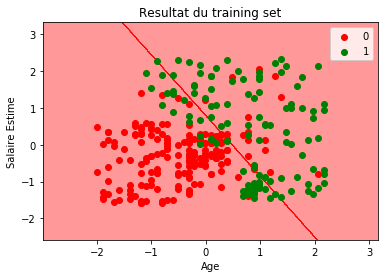

In [5]:
from matplotlib.colors import ListedColormap
x_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step =0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max()+1, step =0.01))
plt.contourf(x1,x2, model.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
             alpha= 0.4, cmap= ListedColormap('red','green'))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red','green'))(i), label = j)
plt.title('Resultat du training set')
plt.xlabel('Age')
plt.ylabel('Salaire Estime')
plt.legend()
plt.show()